In [1]:
# SEQN 
# DEMOGRAPHIC
# DMDBORN4 - In what country {were you/was SP} born?
# INDFMPIR - A ratio of family income to poverty guidelines.
# RIAGENDR - Gender (1 Male , 2 Female)
# RIDAGEYR - Age in years
# DMDHRBR4 - HH reference person's country of birth
# DMDEDUC2 - What is the highest grade or level of school {you have/SP has} completed or the highest degree {you have/s/he has} received?
# DMDMARTL - Marital status
# DMDHHSIZ - Total number of people in the Household
# INDFMIN2 - Total family income (reported as a range value in dollars)
# RIDRETH1 - Recode of reported race and Hispanic origin information

# QUESTIONNARIE

# DUQ370 - Ever use a needle to inject illegal drug?
# IMQ020 - Received Hepatitis B 3 dose series?
# ALQ120Q - How often drink alcohol over past 12 months
# OHXIMP - Tooth Count: Ever had a tooth replaced with a surgical implant?
# SXQ251 - In the past 12 months, about how often have you had {vaginal or anal/vaginal/anal} sex without using a condom?
# HIQ031A - {Are you/Is SP} covered by private insurance?

# BMXBMI - Body Mass Index (kg/m**2)
# BMXWAIST - Waist Circumference (cm)

# TARGET
# LBXHBS - Hepatitis B Surface Antibody (HBsAg)

In [2]:
import pandas as pd

# Read my dataframe csv
df = pd.read_csv(r'C:\Users\Alex\Desktop\GRIFOLS\TFG\Código\BioPredict\data\processed\merged_cleaned.csv')

In [3]:
# Select the columns that I want to use
df = df[['SEQN', 'LBXHBS', 'DMDBORN4', 'INDFMPIR', 'RIAGENDR', 'RIDAGEYR', 'DMDHRBR4', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'INDFMIN2', 'RIDRETH1', 'DUQ370', 'IMQ020', 'ALQ120Q', 'OHXIMP', 'SXQ251', 'HIQ031A', 'BMXBMI', 'BMXWAIST']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8261 entries, 0 to 8260
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      8261 non-null   int64  
 1   LBXHBS    8261 non-null   float64
 2   DMDBORN4  8261 non-null   int64  
 3   INDFMPIR  7665 non-null   float64
 4   RIAGENDR  8261 non-null   int64  
 5   RIDAGEYR  8261 non-null   int64  
 6   DMDHRBR4  8037 non-null   float64
 7   DMDEDUC2  5360 non-null   float64
 8   DMDMARTL  5360 non-null   float64
 9   DMDHHSIZ  8261 non-null   int64  
 10  INDFMIN2  8174 non-null   float64
 11  RIDRETH1  8261 non-null   int64  
 12  DUQ370    4368 non-null   float64
 13  IMQ020    8261 non-null   int64  
 14  ALQ120Q   4321 non-null   float64
 15  OHXIMP    4165 non-null   float64
 16  SXQ251    2814 non-null   float64
 17  HIQ031A   3972 non-null   float64
 18  BMXBMI    8171 non-null   float64
 19  BMXWAIST  7890 non-null   float64
dtypes: float64(13), int64(7)
memor

In [5]:
# See percentage of missing values in each column
missing_values = df.isnull().mean() * 100
missing_values


SEQN         0.000000
LBXHBS       0.000000
DMDBORN4     0.000000
INDFMPIR     7.214623
RIAGENDR     0.000000
RIDAGEYR     0.000000
DMDHRBR4     2.711536
DMDEDUC2    35.116814
DMDMARTL    35.116814
DMDHHSIZ     0.000000
INDFMIN2     1.053141
RIDRETH1     0.000000
DUQ370      47.125045
IMQ020       0.000000
ALQ120Q     47.693984
OHXIMP      49.582375
SXQ251      65.936327
HIQ031A     51.918654
BMXBMI       1.089456
BMXWAIST     4.490982
dtype: float64

In [6]:
print(df['LBXHBS'].value_counts())
print("Where 1 is positive and 2 is negative")



LBXHBS
2.0    5623
1.0    2638
Name: count, dtype: int64
Where 1 is positive and 2 is negative


In [7]:
# check if seqn has duplicates
print(df['SEQN'].duplicated().sum())


0


In [8]:
import pandas as pd

# Supongamos que tu DataFrame se llama df
df = df.rename(columns={
    "DMDBORN4": "Country_of_Birth",
    "INDFMPIR": "Income_to_Poverty_Ratio",
    "RIAGENDR": "Gender",
    "RIDAGEYR": "Age",
    "DMDHRBR4": "Household_Reference_Country",
    "DMDEDUC2": "Education_Level",
    "DMDMARTL": "Marital_Status",
    "DMDHHSIZ": "Household_Size",
    "INDFMIN2": "Family_Income",
    "RIDRETH1": "Race_Ethnicity",
    
    "DUQ370": "Injected_Drugs_Ever",
    "IMQ020": "HepatitisB_Vaccinated",
    "ALQ120Q": "Alcohol_Frequency_12m",
    "OHXIMP": "Dental_Implant",
    "SXQ251": "Unprotected_Sex_12m",
    "HIQ031A": "Private_Insurance",
    

    "BMXBMI": "Body_Mass_Index",
    "BMXWAIST": "Waist_Circumference",
    "LBXHBS": "HBsAg"
})

# Verifica los nuevos nombres de las columnas
print(df.columns)


Index(['SEQN', 'HBsAg', 'Country_of_Birth', 'Income_to_Poverty_Ratio',
       'Gender', 'Age', 'Household_Reference_Country', 'Education_Level',
       'Marital_Status', 'Household_Size', 'Family_Income', 'Race_Ethnicity',
       'Injected_Drugs_Ever', 'HepatitisB_Vaccinated', 'Alcohol_Frequency_12m',
       'Dental_Implant', 'Unprotected_Sex_12m', 'Private_Insurance',
       'Body_Mass_Index', 'Waist_Circumference'],
      dtype='object')


# EDA

In [21]:
from ydata_profiling import ProfileReport


profile = ProfileReport(df, title="Reporte Exploratorio del Dataset", explorative=True)
profile.to_file("exploration_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 43.21it/s]


In [52]:
df["HBsAg"].value_counts()

HBsAg
2.0    5623
1.0    2638
Name: count, dtype: int64

In [58]:

# define a function to do the plot
import seaborn as sns
import matplotlib.pyplot as plt
def plot_categorical(data, x, y, hue=None, palette=None, ax=None):

    tab_cont = pd.crosstab(df[x], df[y], margins=True)
    sns.heatmap(tab_cont, annot=True, fmt="d")
    plt.title(f"Contingency table between {x} and {y}")
    plt.show()
    

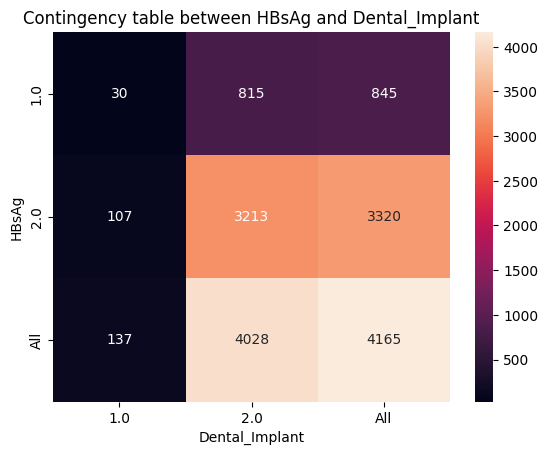

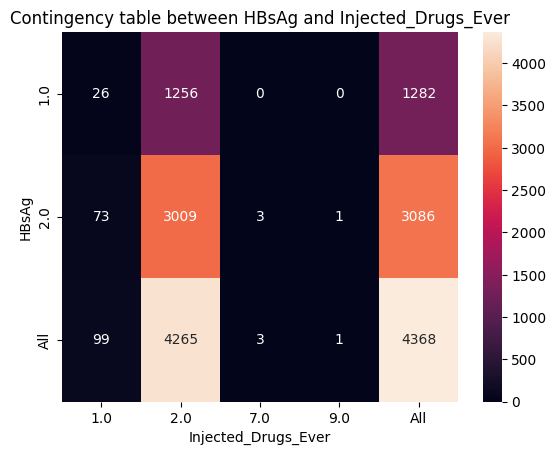

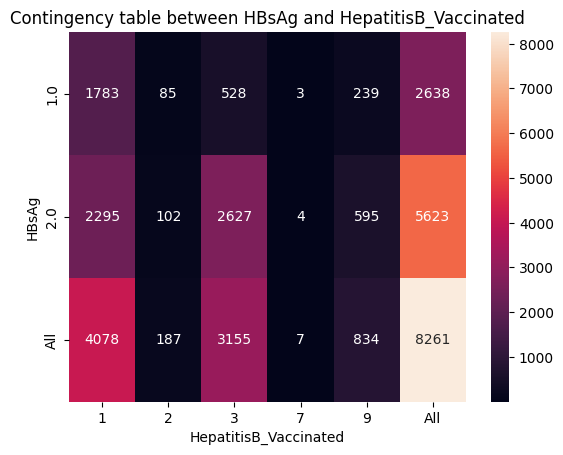

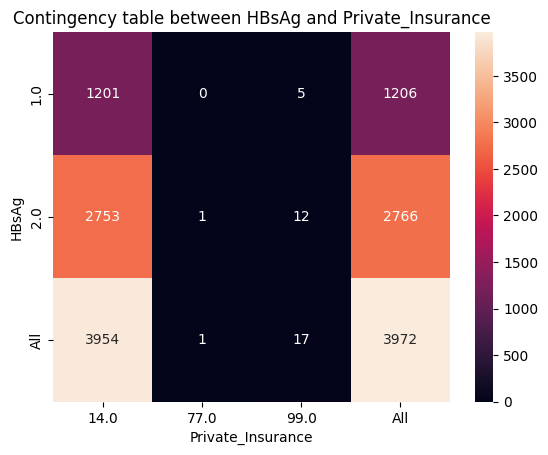

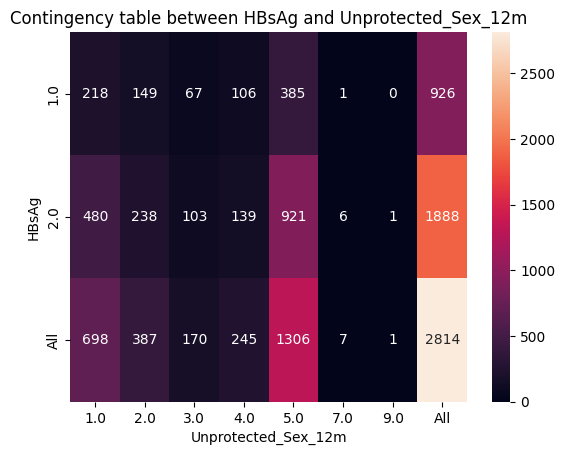

In [63]:
columns= ["Dental_Implant", "Injected_Drugs_Ever", "HepatitisB_Vaccinated","Private_Insurance", "Unprotected_Sex_12m"]
for colum in  columns:
    plot_categorical(df, "HBsAg", colum)



# MODELS

In [ ]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(df, target = 'HBsAg', session_id = 123)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,123
1,Target,HBsAg
2,Target type,Binary
3,Target mapping,"1.0: 0, 2.0: 1"
4,Original data shape,"(8261, 20)"
5,Transformed data shape,"(8261, 20)"
6,Transformed train set shape,"(5782, 20)"
7,Transformed test set shape,"(2479, 20)"
8,Numeric features,19
9,Rows with missing values,89.0%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [10]:
best_model = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7330,0.7653,0.7330,0.7184,0.7149,0.3234,0.3374,0.8950
rf,Random Forest Classifier,0.7305,0.7579,0.7305,0.7167,0.7167,0.3299,0.3390,0.3840
et,Extra Trees Classifier,0.7255,0.7517,0.7255,0.7099,0.7095,0.3118,0.3220,0.3420
lightgbm,Light Gradient Boosting Machine,0.7253,0.7539,0.7253,0.7120,0.7134,0.3238,0.3305,1.3040
ada,Ada Boost Classifier,0.7212,0.7435,0.7212,0.7039,0.7007,0.2891,0.3035,0.3090
lr,Logistic Regression,0.6864,0.6981,0.6864,0.6549,0.6480,0.1631,0.1832,0.5800
ridge,Ridge Classifier,0.6847,0.6977,0.6847,0.6493,0.6375,0.1396,0.1641,0.0400
lda,Linear Discriminant Analysis,0.6844,0.6977,0.6844,0.6530,0.6486,0.1642,0.1819,0.0330
dummy,Dummy Classifier,0.6807,0.5000,0.6807,0.4634,0.5514,0.0000,0.0000,0.0250
knn,K Neighbors Classifier,0.6513,0.5997,0.6513,0.6238,0.6311,0.1261,0.1302,0.0850


In [11]:
#s.evaluate_model(best_model)

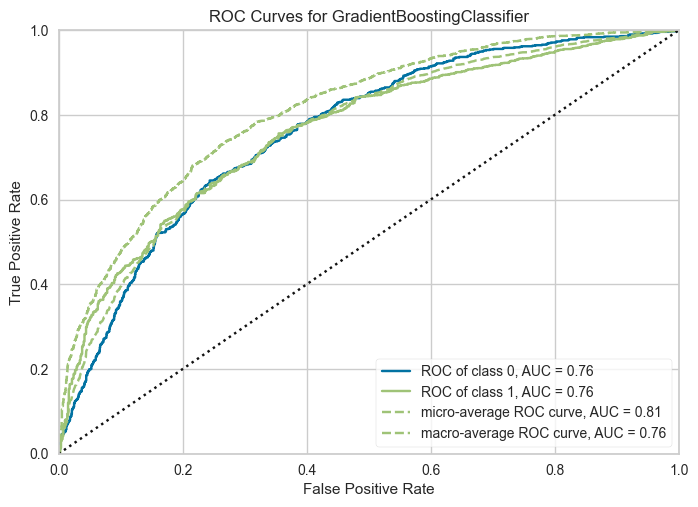

In [12]:

s.plot_model(best_model, plot = 'auc')

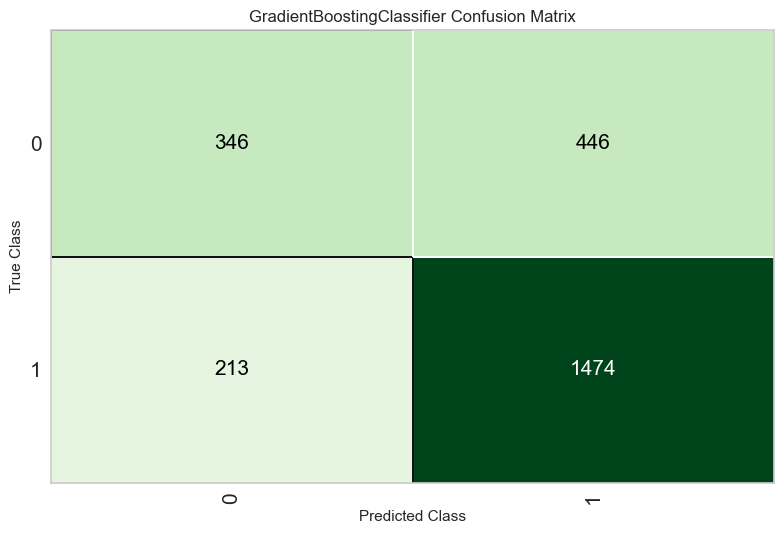

In [13]:

s.plot_model(best_model, plot = 'confusion_matrix')

In [14]:
s.predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7342,0.7616,0.7342,0.7202,0.7198,0.3369,0.3466


,SEQN,Country_of_Birth,Income_to_Poverty_Ratio,Gender,Age,Household_Reference_Country,Education_Level,Marital_Status,Household_Size,Family_Income,...,HepatitisB_Vaccinated,Alcohol_Frequency_12m,Dental_Implant,Unprotected_Sex_12m,Private_Insurance,Body_Mass_Index,Waist_Circumference,HBsAg,prediction_label,prediction_score
5123,79898,2,1.40,1,29,2.0,4.0,3.0,7,8.0,...,1,3.0,NaN,2.0,14.0,30.000000,104.800003,1.0,1,0.5870
2270,76376,1,0.65,2,56,1.0,4.0,3.0,7,6.0,...,3,7.0,2.0,NaN,14.0,24.900000,83.000000,2.0,2,0.7561
5613,80484,1,2.11,1,13,1.0,NaN,NaN,7,14.0,...,1,NaN,NaN,NaN,NaN,21.200001,71.000000,2.0,2,0.6915
1185,75049,1,NaN,1,59,1.0,4.0,1.0,2,77.0,...,3,NaN,2.0,NaN,14.0,31.000000,119.400002,1.0,2,0.9299
1556,75500,1,3.48,2,75,1.0,5.0,2.0,1,7.0,...,3,5.0,2.0,NaN,14.0,26.799999,100.199997,2.0,2,0.9436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,76158,1,0.64,2,72,1.0,2.0,1.0,2,3.0,...,3,1.0,2.0,NaN,14.0,28.600000,95.500000,2.0,2,0.9307
3357,77705,1,5.00,1,63,1.0,5.0,1.0,2,14.0,...,3,7.0,2.0,NaN,14.0,23.900000,86.500000,2.0,2,0.9269
827,74601,1,0.84,2,20,1.0,3.0,5.0,4,5.0,...,1,NaN,NaN,2.0,NaN,18.700001,61.299999,2.0,1,0.5459
8090,83525,1,4.51,1,33,1.0,3.0,5.0,3,10.0,...,1,1.0,2.0,5.0,14.0,35.700001,129.000000,2.0,2,0.8188


In [15]:
s.save_model(best_model, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SEQN', 'Country_of_Birth',
                                              'Income_to_Poverty_Ratio',
                                              'Gender', 'Age',
                                              'Household_Reference_Country',
                                              'Education_Level',
                                              'Marital_Status', 'Househo...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                                             max_depth=3, max_features=None,
            

In [17]:
gbc = s.create_model('gbc', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7547,0.8145,0.7547,0.7455,0.7338,0.3670,0.3901
1,0.7323,0.7577,0.7323,0.7185,0.7190,0.3358,0.3441
2,0.6920,0.7022,0.6920,0.6671,0.6678,0.2112,0.2229
3,0.7284,0.7543,0.7284,0.7122,0.7074,0.3054,0.3217
4,0.7284,0.7739,0.7284,0.7129,0.7113,0.3163,0.3281
5,0.7163,0.7612,0.7163,0.7006,0.7026,0.2979,0.3050
6,0.7526,0.7792,0.7526,0.7411,0.7383,0.3786,0.3908
7,0.7093,0.7495,0.7093,0.6894,0.6897,0.2619,0.2729
8,0.7595,0.7901,0.7595,0.7492,0.7443,0.3922,0.4069


In [19]:
tuned_gbc = s.tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7358,0.8090,0.7358,0.7303,0.6966,0.2798,0.3260
1,0.7392,0.7579,0.7392,0.7278,0.7111,0.3126,0.3419
2,0.6903,0.7042,0.6903,0.6571,0.6417,0.1513,0.1792
3,0.7042,0.7535,0.7042,0.6803,0.6577,0.1892,0.2241
4,0.7336,0.7869,0.7336,0.7239,0.6982,0.2833,0.3219
5,0.7145,0.7700,0.7145,0.6942,0.6838,0.2485,0.2718
6,0.7232,0.7840,0.7232,0.7085,0.6836,0.2465,0.2845
7,0.7076,0.7471,0.7076,0.6857,0.6584,0.1888,0.2282
8,0.7439,0.8001,0.7439,0.7412,0.7073,0.3030,0.3497


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [20]:
bagged_gbc = s.ensemble_model(tuned_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7547,0.8130,0.7547,0.7451,0.7346,0.3691,0.3908
1,0.7461,0.7583,0.7461,0.7346,0.7348,0.3740,0.3817
2,0.6903,0.7017,0.6903,0.6658,0.6673,0.2106,0.2210
3,0.7249,0.7473,0.7249,0.7079,0.7036,0.2965,0.3123
4,0.7370,0.7782,0.7370,0.7229,0.7194,0.3349,0.3489
5,0.7284,0.7651,0.7284,0.7131,0.7121,0.3184,0.3294
6,0.7561,0.7863,0.7561,0.7455,0.7385,0.3775,0.3952
7,0.7059,0.7445,0.7059,0.6849,0.6851,0.2507,0.2620
8,0.7578,0.7951,0.7578,0.7474,0.7414,0.3849,0.4011


In [7]:
pip install pycaret[analysis]

     ---------------------------------------- 0.0/450.3 kB ? eta -:--:--
     -------------- ----------------------- 174.1/450.3 kB 5.1 MB/s eta 0:00:01
     -------------------------------------- 450.3/450.3 kB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/395.7 kB ? eta -:--:--
     ---------------------------------------- 395.7/395.7 kB ? eta 0:00:00
     ---------------------------------------- 0.0/287.9 kB ? eta -:--:--
     ------------------------------------- 287.9/287.9 kB 18.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
     ---------------------------------------- 88.8/88.8 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/177.5 kB ? eta -:--:--
     ---------------------------------------- 177.5/177.5 kB ? eta 0:00:00
     ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
     ---------------------------------------- 47.1/47.1 kB ? eta 0:00:00
     ----------------

  DEPRECATION: htmlmin is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  DEPRECATION: dash-cytoscape is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 w